# TensorFlow and Keras 101 <a class="tocSkip">

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/armando-fandango/Mastering-Tensorflow/blob/tf2/Chapter01/ch-01_TensorFlow_Keras_101.ipynb"><img src="https://colab.research.google.com/img/colab_favicon.ico" style="width:30px;" />Run in Google Colab</a>
  </td>
</table>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Install-TensorFlow-2.0-alpha" data-toc-modified-id="Install-TensorFlow-2.0-alpha-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Install TensorFlow 2.0 alpha</a></span></li><li><span><a href="#Import-TensorFlow-and-Keras" data-toc-modified-id="Import-TensorFlow-and-Keras-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import TensorFlow and Keras</a></span></li><li><span><a href="#Customary-Hello-TensorFlow-!!!" data-toc-modified-id="Customary-Hello-TensorFlow-!!!-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Customary Hello TensorFlow !!!</a></span></li><li><span><a href="#TF-Keras" data-toc-modified-id="TF-Keras-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>TF Keras</a></span><ul class="toc-item"><li><span><a href="#Load-the-MNIST-dataset" data-toc-modified-id="Load-the-MNIST-dataset-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Load the MNIST dataset</a></span></li><li><span><a href="#TF-Keras-Sequential-Model" data-toc-modified-id="TF-Keras-Sequential-Model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>TF Keras Sequential Model</a></span></li><li><span><a href="#Plot-the-model" data-toc-modified-id="Plot-the-model-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Plot the model</a></span></li><li><span><a href="#Visualize-Training-with-History-Object" data-toc-modified-id="Visualize-Training-with-History-Object-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Visualize Training with History Object</a></span></li><li><span><a href="#Visualizing-with-TensorBoard" data-toc-modified-id="Visualizing-with-TensorBoard-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Visualizing with TensorBoard</a></span></li><li><span><a href="#TF-Keras-Functional-API" data-toc-modified-id="TF-Keras-Functional-API-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>TF Keras Functional API</a></span></li><li><span><a href="#TF-Keras-Model-Subclass-API" data-toc-modified-id="TF-Keras-Model-Subclass-API-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>TF Keras Model Subclass API</a></span></li></ul></li></ul></div>

In [1]:
# Imports to make notebook compatible with Python 2
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow 2.0 alpha

In [2]:
!pip install -U tensorflow-gpu==2.0.0-alpha0

#!pip install tensorflow==2.0.0-alpha0

  Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-alpha0 (from versions: 0.12.1, 1.0.0, 1.0.1, 1.1.0rc0, 1.1.0rc1, 1.1.0rc2, 1.1.0)
No matching distribution found for tensorflow-gpu==2.0.0-alpha0


# Import TensorFlow and Keras

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
    
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

import sys
from IPython import display

print('Python : {}'.format(sys.version))
for package in tf, keras, np, pd, mpl:
    print('{} : {}'.format(package.__name__, package.__version__))

Python : 3.6.8 |Anaconda custom (64-bit)| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
tensorflow : 2.0.0-dev20190406
tensorflow.keras : 2.2.4-tf
numpy : 1.16.2
pandas : 0.24.2
matplotlib : 3.0.3


# Customary Hello TensorFlow !!!

In [4]:
hello = tf.constant('Hello TensorFlow 2 !!')
tf.print(hello)

Hello TensorFlow 2 !!


In [5]:
print(hello)

tf.Tensor(b'Hello TensorFlow 2 !!', shape=(), dtype=string)


# TF Keras

## Load the MNIST dataset

In [6]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize the values of image vectors to fit under 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# data properties
n_inputs = 784
n_outputs = 10

# reshape data
x_train = x_train.reshape(-1, n_inputs)
x_test = x_test.reshape(-1, n_inputs)

## TF Keras Sequential Model

In [7]:
from tensorflow.keras.layers import Dense, Dropout

# define hyperparameters
n_neurons = [128, 128]
dropout_val = 0.1
batch_size = 100
n_epochs = 5

# build a sequential model
model = keras.Sequential(name='MNIST Keras Sequential API')

# add the first fully connected layer
model.add(
    Dense(units=n_neurons[0], activation='sigmoid', input_shape=(n_inputs, )))
model.add(Dropout(dropout_val))

# add second fully connected layer
model.add(Dense(units=n_neurons[1], activation='sigmoid'))
model.add(Dropout(dropout_val))

# add output layer
model.add(Dense(units=n_outputs, activation='softmax'))

# alternative code to build the same sequential model
# model = keras.Sequential([
#     Dense(units=n_neurons[0], activation='sigmoid',
#           input_shape=(n_inputs,)),
#     Dropout(dropout_val),
#     Dense(units=n_neurons[1], activation='sigmoid'),
#     Dropout(dropout_val),
#     Dense(units=n_outputs, activation='softmax')
# ])

# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the model
history = model.fit(x_train, y_train, batch_size=batch_size, 
                    epochs=n_epochs)

# evaluate the model and print the accuracy score
scores = model.evaluate(x_test, y_test)

print('\nloss:', scores[0])
print('accuracy:', scores[1])

Epoch 1/5
60000/60000 [==============================] - 1s 21us/sample - loss: 2.3508 - accuracy: 0.1023
Epoch 2/5
60000/60000 [==============================] - 1s 18us/sample - loss: 2.3196 - accuracy: 0.1085
Epoch 3/5
60000/60000 [==============================] - 1s 20us/sample - loss: 2.3125 - accuracy: 0.1150
Epoch 4/5
60000/60000 [==============================] - 1s 19us/sample - loss: 2.3073 - accuracy: 0.1170
Epoch 5/5
10000/10000 [==============================] - 0s 34us/sample - loss: 2.2730 - accuracy: 0.1480

loss: 2.2730471534729
accuracy: 0.148


## Plot the model

Model: "MNIST Keras Sequential API"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


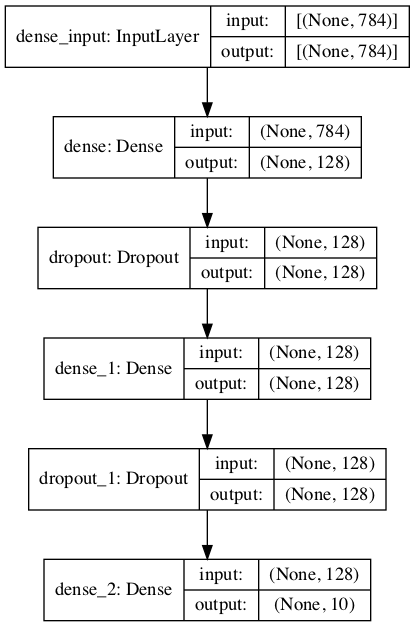

In [8]:
# print the summary of our model
model.summary()

# plot the model
keras.utils.plot_model(model,
                       to_file='mnist_tfk_seq_api.png',
                       show_shapes=True,
                       show_layer_names=True)
display.display(display.Image('mnist_tfk_seq_api.png'))


## Visualize Training with History Object

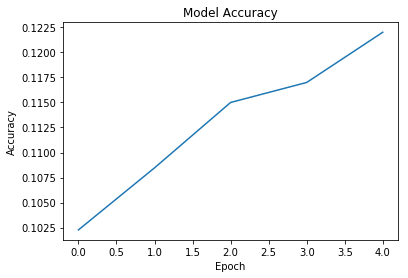

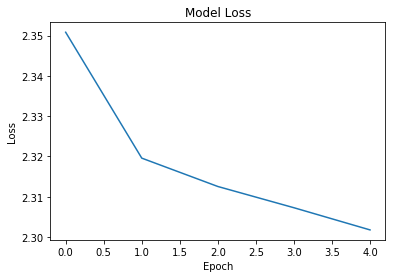

In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

## Visualizing with TensorBoard

In [10]:
# Install Jupyter Tensorboard plugin using the following commands:

#!pip install -U tb-nightly
!pip install -U jupyter-tensorboard
!jupyter tensorboard enable --user

Requirement already up-to-date: jupyter-tensorboard in /usr/local/anaconda3/envs/tf2/lib/python3.6/site-packages (0.1.10)
Enabling tree extension jupyter_tensorboard/tree...
      - Validating: OK
Enabling: jupyter_tensorboard
- Writing config: /Users/armando/.jupyter
    - Validating...
      jupyter_tensorboard 0.1.10 OK


In [11]:
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime
import os

logs_dir = 'tflogs'
os.makedirs(logs_dir, exist_ok=True)

In [12]:
from tensorflow.keras.layers import Dense, Dropout

# define hyperparameters
n_neurons = [128, 128]
dropout_val = 0.1
batch_size = 100
n_epochs = 5

# build a sequential model
model = keras.Sequential([
    Dense(units=n_neurons[0], activation='sigmoid',
          input_shape=(n_inputs,)),
    Dropout(dropout_val),
    Dense(units=n_neurons[1], activation='sigmoid'),
    Dropout(dropout_val),
    Dense(units=n_outputs, activation='softmax')
], name='MNIST Keras Sequential API')

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

log_dir = os.path.join(logs_dir,
                        datetime.now().strftime("%Y%m%d-%H%M%S"))
tbc = TensorBoard(log_dir=log_dir,
                  histogram_freq=1,
                   write_graph=True,  
                  write_images=True
                 )

history = model.fit(x_train, y_train, batch_size=batch_size, 
                    epochs=n_epochs, callbacks=[tbc])
scores = model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 1s 21us/sample - loss: 2.3745 - accuracy: 0.1003
Epoch 2/5
60000/60000 [==============================] - 1s 20us/sample - loss: 2.3138 - accuracy: 0.1130
Epoch 3/5
60000/60000 [==============================] - 1s 20us/sample - loss: 2.3059 - accuracy: 0.1205
Epoch 4/5
60000/60000 [==============================] - 1s 20us/sample - loss: 2.3029 - accuracy: 0.1244
Epoch 5/5
10000/10000 [==============================] - 0s 32us/sample - loss: 2.2669 - accuracy: 0.2177


In [13]:
!tensorboard --inspect --logdir {log_dir}

Processing event files... (this can take a few minutes)

Found event files in:
tflogs/20190528-214816/train

These tags are in tflogs/20190528-214816/train:
audio -
histograms
   dense_3/bias_0
   dense_3/kernel_0
   dense_4/bias_0
   dense_4/kernel_0
   dense_5/bias_0
   dense_5/kernel_0
images
   dense_3/bias_0/image/0
   dense_3/kernel_0/image/0
   dense_4/bias_0/image/0
   dense_4/kernel_0/image/0
   dense_5/bias_0/image/0
   dense_5/kernel_0/image/0
scalars
   epoch_accuracy
   epoch_loss
tensor
   batch_2
   keras

Event statistics for tflogs/20190528-214816/train:
audio -
graph
   first_step           0
   last_step            0
   max_step             0
   min_step             0
   num_steps            1
   outoforder_steps     []
histograms
   first_step           0
   last_step            4
   max_step             4
   min_step             0
   num_steps            5
   outoforder_steps     []
images
   first_step           0
   last_step            4
   max_step             

In [14]:
# load TensorBoard notebook extension
%load_ext tensorboard.notebook
%tensorboard --logdir tflogs/

Reusing TensorBoard on port 6007 (pid 26739), started -1 day, 23:11:48 ago. (Use '!kill 26739' to kill it.)

W0528 21:48:26.091034 4712060352 manager.py:322] invalid info file: '/var/folders/q6/82ch7xnx3bsbm2ww5dddlj2r0000gn/T/.tensorboard-info/pid-26090.info'
Traceback (most recent call last):
  File "/usr/local/anaconda3/envs/tf2/lib/python3.6/site-packages/tensorboard/manager.py", line 317, in get_all
    info = _info_from_string(contents)
  File "/usr/local/anaconda3/envs/tf2/lib/python3.6/site-packages/tensorboard/manager.py", line 158, in _info_from_string
    raise ValueError("incompatible version: %r" % (json_value,))
ValueError: incompatible version: {'cache_key': 'eyJhcmd1bWVudHMiOlsiLS1sb2dkaXIiLCJ0ZmxvZ3MvIl0sImNvbmZpZ3VyZV9rd2FyZ3MiOnt9LCJ3b3JraW5nX2RpcmVjdG9yeSI6Ii9Vc2Vycy9hcm1hbmRvL3Byb2plY3RzL2Jvb2tzL3RlbnNvcnRhbGsvbWFzdGVyaW5nLXRlbnNvcmZsb3cvQ2hhcHRlcjAxIn0=', 'db': '', 'logdir': 'tflogs/', 'path_prefix': '', 'pid': 26090, 'port': 6006, 'start_time': 1559084579, 'version': '1.14.0a20190301'}
W0528 21:48:26.098376 4712060352 manager.py:322] invalid info file: '/var/folders/q6/

In [15]:
from tensorflow.keras.layers import Dense, Dropout

# define hyperparameters
n_neurons = [128, 128]
dropout_val = 0.1
batch_size = 100
n_epochs = 5  # change this to 50000

# build a sequential model
model = keras.Sequential([
    Dense(units=n_neurons[0], activation='sigmoid',
          input_shape=(n_inputs,)),
    Dropout(dropout_val),
    Dense(units=n_neurons[1], activation='sigmoid'),
    Dropout(dropout_val),
    Dense(units=n_outputs, activation='softmax')
], name='MNIST Keras Sequential API')

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

log_dir = os.path.join(logs_dir,
                        datetime.now().strftime("%Y%m%d-%H%M%S"))
tbc = TensorBoard(log_dir=log_dir,
                  histogram_freq=1,
                   write_graph=True,  
                  write_images=True
                 )

history = model.fit(x_train, y_train, batch_size=batch_size, 
                    epochs=n_epochs, callbacks=[tbc], verbose=0)
scores = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 33us/sample - loss: 2.2681 - accuracy: 0.2063


## TF Keras Functional API 

In [16]:
from tensorflow.keras.layers import Dense, Dropout

# define hyperparameters
n_neurons = [128, 128]
dropout_val = 0.1
batch_size = 100
n_epochs = 5

# define input layer
input_layer = keras.Input(shape=(n_inputs,))  

# define hidden layers and output
x = Dense(units=n_neurons[0], activation='sigmoid')(input_layer)
x = Dropout(dropout_val)(x)
x = Dense(units=n_neurons[1], activation='sigmoid')(x)
x = Dropout(dropout_val)(x)
output_layer = Dense(units=n_outputs, activation='softmax')(x)

# build a functional model
model = keras.Model(inputs=input_layer, outputs=output_layer,
                    name='MNIST Keras Functional API')

# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the model
model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs)

# evaluate the model and print the accuracy score
scores = model.evaluate(x_test, y_test)

print('\nloss:', scores[0])
print('accuracy:', scores[1])

Epoch 1/5
60000/60000 [==============================] - 1s 22us/sample - loss: 2.3762 - accuracy: 0.1023
Epoch 2/5
60000/60000 [==============================] - 1s 20us/sample - loss: 2.3153 - accuracy: 0.1119
Epoch 3/5
60000/60000 [==============================] - 1s 21us/sample - loss: 2.3078 - accuracy: 0.1164
Epoch 4/5
60000/60000 [==============================] - 1s 20us/sample - loss: 2.3034 - accuracy: 0.1204
Epoch 5/5
10000/10000 [==============================] - 0s 35us/sample - loss: 2.2695 - accuracy: 0.1665

loss: 2.2695393844604492
accuracy: 0.1665


Model: "MNIST Keras Functional API"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
__________________________________

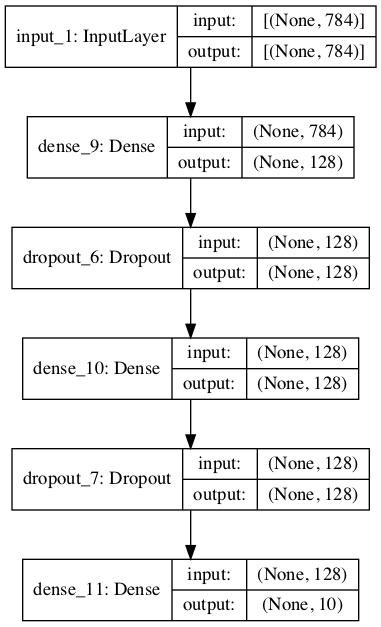

In [17]:
# print the summary of our model
model.summary()

# plot the model
keras.utils.plot_model(model, 
                       to_file='mnist_tfk_func_api.png', 
                       show_shapes=True, 
                       show_layer_names=True)
display.display(display.Image('mnist_tfk_func_api.png'))

## TF Keras Model Subclass API 

In [18]:
from tensorflow.keras.layers import Dense, Dropout

# define hyperparameters
n_neurons = [128, 128]
dropout_val = 0.1
batch_size = 100
n_epochs = 5


class TheModel(keras.Model):
    def __init__(self, n_inputs, n_outputs):
        super(TheModel, self).__init__(name='the_model')
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs

        # Define the layers
        self.l_in = Dense(units=n_neurons[0],
                          activation='sigmoid',
                          input_shape=(n_inputs, ))
        self.l_1 = Dropout(dropout_val)
        self.l_2 = Dense(units=n_neurons[1], activation='sigmoid')
        self.l_3 = Dropout(dropout_val)
        self.l_out = Dense(units=n_outputs, activation='softmax')

    def call(self, inputs):
        # Define the forward pass with the self.l_ layers
        x = self.l_in(inputs)
        x = self.l_1(x)
        x = self.l_2(x)
        x = self.l_3(x)
        return self.l_out(x)
    
    def compute_output_shape(self, input_shape):
        shape = tf.TensorShape(input_shape).as_list()
        shape[-1] = self.n_outputs
        return tf.TensorShape(shape)


model = TheModel(n_inputs=n_inputs, n_outputs=n_outputs)
model.build(input_shape=(batch_size,n_inputs))

# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the model
model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs)

# evaluate the model and print the accuracy score
scores = model.evaluate(x_test, y_test)

print('\n loss:', scores[0])
print('\n accuracy:', scores[1])

Epoch 1/5
60000/60000 [==============================] - 1s 22us/sample - loss: 2.3635 - accuracy: 0.1015
Epoch 2/5
60000/60000 [==============================] - 1s 20us/sample - loss: 2.3228 - accuracy: 0.1069
Epoch 3/5
60000/60000 [==============================] - 1s 20us/sample - loss: 2.3170 - accuracy: 0.1089
Epoch 4/5
60000/60000 [==============================] - 1s 21us/sample - loss: 2.3137 - accuracy: 0.1131
Epoch 5/5
10000/10000 [==============================] - 0s 34us/sample - loss: 2.2743 - accuracy: 0.1558

 loss: 2.2743089149475098

 accuracy: 0.1558


Model: "the_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             multiple                  100480    
_________________________________________________________________
dropout_8 (Dropout)          multiple                  0         
_________________________________________________________________
dense_13 (Dense)             multiple                  16512     
_________________________________________________________________
dropout_9 (Dropout)          multiple                  0         
_________________________________________________________________
dense_14 (Dense)             multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


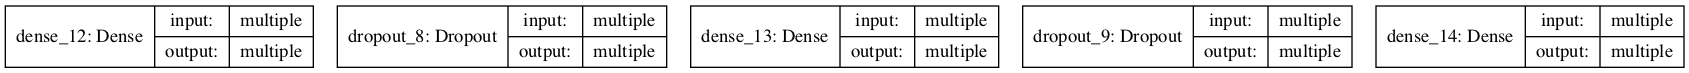

In [19]:
# print the summary of our model
model.summary()

# plot the model
keras.utils.plot_model(model, 
                       to_file='mnist_tfk_subclass.png', 
                       show_shapes=True, 
                       show_layer_names=True)
display.display(display.Image('mnist_tfk_subclass.png'))